# Bot-IoT

## Carga y Limpieza

In [2]:
from DataLoader import DataLoader
from DataProcessor import DataProcessor
import pandas as pd

loader = DataLoader()

In [3]:
df = loader.load_dataset('/home/joel/.cache/kagglehub/datasets/vigneshvenkateswaran/bot-iot/versions/1/data_10.csv', file_type='csv')

2025-09-05 11:00:07,610 - INFO - CSV file loaded successfully:           stime flgs proto            saddr   sport          daddr  dport  \
0  1.528083e+09  e s   tcp  192.168.100.150  5712.0  192.168.100.6   80.0   
1  1.528083e+09  e s   tcp  192.168.100.150  5713.0  192.168.100.6   80.0   
2  1.528083e+09  e s   tcp  192.168.100.150  5594.0  192.168.100.6   80.0   
3  1.528083e+09  e s   tcp  192.168.100.150  5595.0  192.168.100.6   80.0   
4  1.528083e+09  e s   tcp  192.168.100.150  5598.0  192.168.100.6   80.0   

   pkts  bytes state  ...  spkts  dpkts  sbytes  dbytes      rate     srate  \
0     4    616   REQ  ...      4      0     616       0  0.050914  0.050914   
1     4    616   REQ  ...      4      0     616       0  0.050914  0.050914   
2     6    736   RST  ...      4      2     616     120  0.084802  0.050914   
3     6    736   RST  ...      4      2     616     120  0.084802  0.050914   
4     6    736   RST  ...      4      2     616     120  0.084802  0.050914   


In [4]:
df.head()

,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1.528083e+09,e s,tcp,192.168.100.150,5712.0,192.168.100.6,80.0,4,616,REQ,...,4,0,616,0,0.050914,0.050914,0.000000,1,DoS,TCP
1,1.528083e+09,e s,tcp,192.168.100.150,5713.0,192.168.100.6,80.0,4,616,REQ,...,4,0,616,0,0.050914,0.050914,0.000000,1,DoS,TCP
2,1.528083e+09,e s,tcp,192.168.100.150,5594.0,192.168.100.6,80.0,6,736,RST,...,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
3,1.528083e+09,e s,tcp,192.168.100.150,5595.0,192.168.100.6,80.0,6,736,RST,...,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
4,1.528083e+09,e s,tcp,192.168.100.150,5598.0,192.168.100.6,80.0,6,736,RST,...,4,2,616,120,0.084802,0.050914,0.016973,1,DoS,TCP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   stime         1000000 non-null  float64
 1   flgs          1000000 non-null  object 
 2   proto         1000000 non-null  object 
 3   saddr         1000000 non-null  object 
 4   sport         999971 non-null   float64
 5   daddr         1000000 non-null  object 
 6   dport         999971 non-null   float64
 7   pkts          1000000 non-null  int64  
 8   bytes         1000000 non-null  int64  
 9   state         1000000 non-null  object 
 10  ltime         1000000 non-null  float64
 11  seq           1000000 non-null  int64  
 12  dur           1000000 non-null  float64
 13  mean          1000000 non-null  float64
 14  stddev        1000000 non-null  float64
 15  smac          0 non-null        float64
 16  dmac          0 non-null        float64
 17  sum           1000000 non-nu

In [21]:
import numpy as np

df_num = df.select_dtypes(include=[np.number])
df_num = df_num.drop(columns=["stime", "sport", "dport", "ltime", "seq", "attack",
"soui", "smac", "dmac", "doui", "sco", "dco"], errors='ignore')

In [16]:
df_num.head()

,pkts,bytes,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate
0,4,616,58.922619,0.000000,0.000000,0.000000,0.0,0.000000,4,0,616,0,0.050914,0.050914,0.000000
1,4,616,58.922619,0.000000,0.000000,0.000000,0.0,0.000000,4,0,616,0,0.050914,0.050914,0.000000
2,6,736,58.960598,0.019105,0.019106,0.076421,0.0,0.038441,4,2,616,120,0.084802,0.050914,0.016972
3,6,736,58.960598,0.019105,0.019106,0.076421,0.0,0.038442,4,2,616,120,0.084802,0.050914,0.016972
4,6,736,58.960598,0.020454,0.020559,0.081817,0.0,0.043839,4,2,616,120,0.084802,0.050914,0.016973


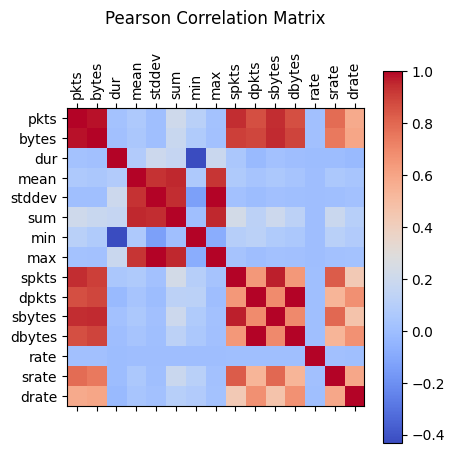

In [22]:
import matplotlib.pyplot as plt
import numpy as np
corr = df_num.corr(method='pearson')

plt.matshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Pearson Correlation Matrix", pad=20)
plt.show()

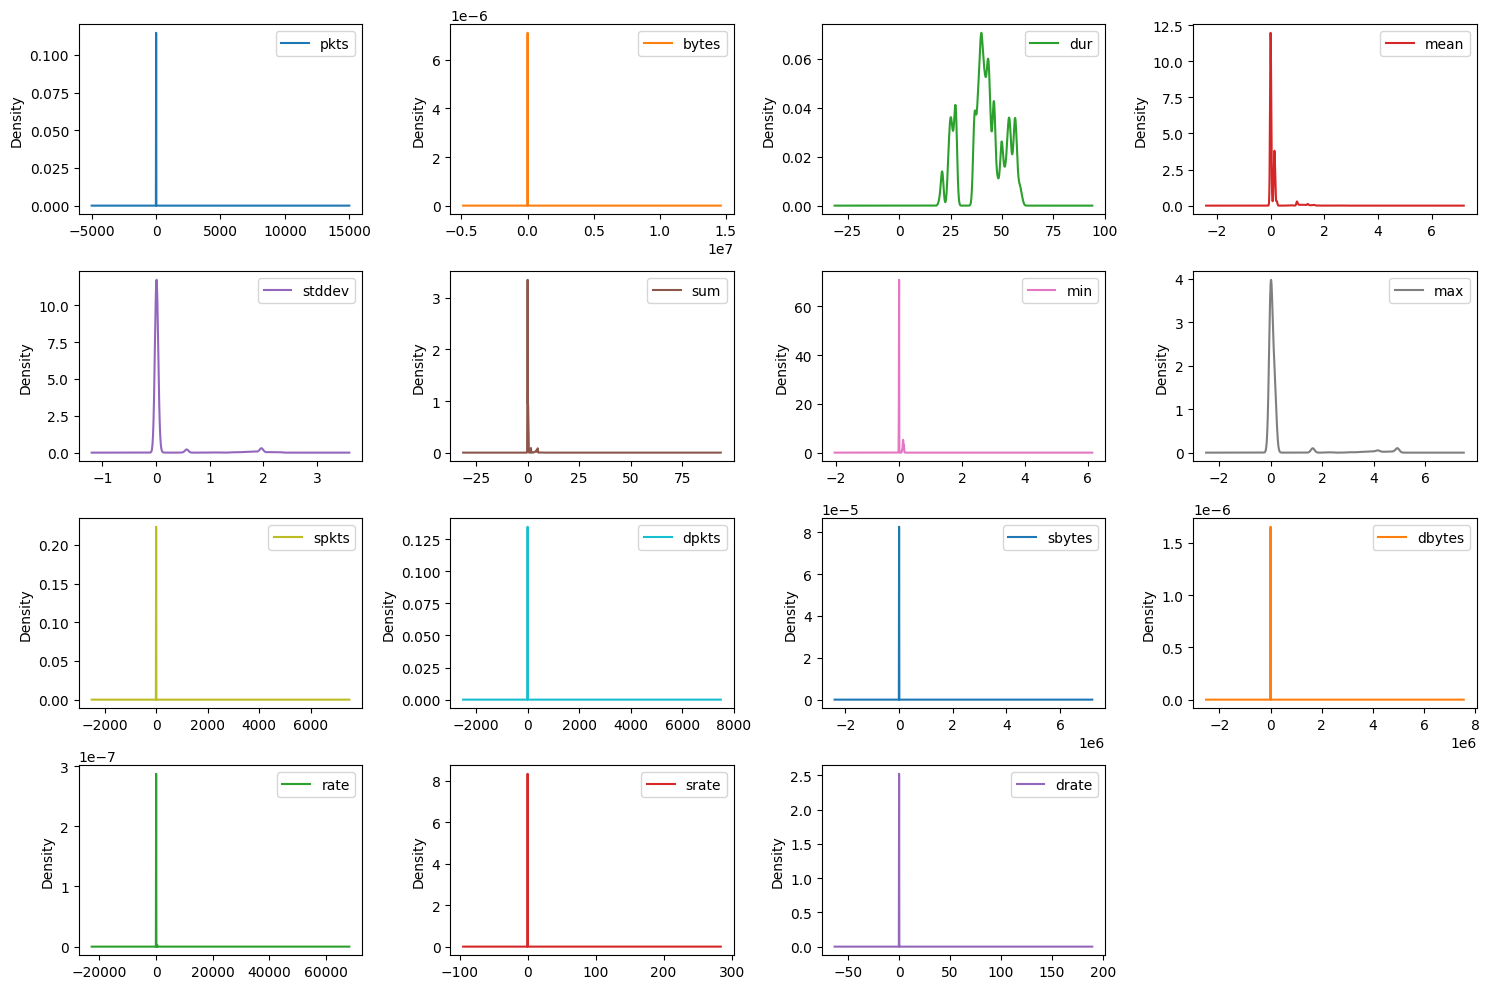

In [23]:
df_num.plot(kind="density", subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

In [5]:
df['category'].value_counts(normalize=True)

category
DoS       0.99997
Normal    0.00003
Name: proportion, dtype: float64

In [6]:
df['category'].value_counts()

category
DoS       999970
Normal        30
Name: count, dtype: int64

In [7]:
import pandas as pd
features = ["spkts", "dpkts", "sbytes", "dbytes", "dur"]

X = df[features].apply(pd.to_numeric, errors="coerce").fillna(0)
y = df["category"].map(lambda x: 0 if x in ["Normal", 0] else 1)
X = X.rename(columns={
    "spkts": "src_pkts",
    "dpkts": "dst_pkts",
    "sbytes": "src_bytes",
    "dbytes": "dst_bytes",
    "dur": "duration"
})

In [8]:
X.head()

,src_pkts,dst_pkts,src_bytes,dst_bytes,duration
0,4,0,616,0,58.922619
1,4,0,616,0,58.922619
2,4,2,616,120,58.960598
3,4,2,616,120,58.960598
4,4,2,616,120,58.960598


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int64

In [10]:
for col in ["duration", "src_bytes", "dst_bytes", "src_pkts", "dst_pkts",
            ]:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# divide categorial and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

## Validation

In [11]:
# import data processor
processor = DataProcessor()

In [12]:
from sklearn.model_selection import StratifiedKFold
# Define the outer and inner cross-validation strategies
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, average_precision_score,
    matthews_corrcoef, brier_score_loss, confusion_matrix,
    classification_report
)
from sklearn.base import clone
import numpy as np
import pandas as pd
import time
import joblib, os

best_models = {
    "XGBoost": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=5, learning_rate=0.1))
    ]),
    "RandomForest": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2))
    ]),
    "MLPClassifier": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", MLPClassifier(hidden_layer_sizes=(50,), activation="relu", alpha=0.0001, max_iter=500, random_state=42))
    ])
}

results = []
preds = {}
for model_name, pipeline in best_models.items():
    print(f"\nEvaluando {model_name}...")

    outer_scores = {"f1": [], "roc_auc": [], "auprc": [], "mcc": [], "brier": [], "fnr": [], "training_time": [], "size": []}
    confusion_matrixes, classification_reports = [], []
    selected_features_folds = []

    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(pipeline)
        start = time.perf_counter()
        model.fit(X_train, y_train)
        train_time = time.perf_counter() - start

        y_pred = model.predict(X_test)
        if f"{model_name}" not in preds:
            preds[f"{model_name}"] = np.zeros(len(y))

        preds[f"{model_name}"][test_idx] = y_pred
        y_proba = model.predict_proba(X_test)[:, 1]

        outer_scores["f1"].append(f1_score(y_test, y_pred))
        outer_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))
        outer_scores["auprc"].append(average_precision_score(y_test, y_proba))
        outer_scores["mcc"].append(matthews_corrcoef(y_test, y_pred))
        outer_scores["brier"].append(brier_score_loss(y_test, y_proba))
        outer_scores["training_time"].append(train_time)

        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        outer_scores["fnr"].append(fnr)
        confusion_matrixes.append(cm)

        report = classification_report(
            y_test, y_pred,
            target_names=["Benigno (0)", "Malicioso (1)"],
            output_dict=True
        )
        classification_reports.append(report)

        select_step = model.named_steps["select"]
        feature_names = model.named_steps["pre"].get_feature_names_out()
        selected_mask = select_step.get_support()
        selected_features = feature_names[selected_mask]
        selected_features_folds.append(list(selected_features))

        joblib.dump(model, "tmp_best_model.pkl")
        size_bytes = os.path.getsize("tmp_best_model.pkl")
        outer_scores["size"].append(size_bytes / 1024)
        os.remove("tmp_best_model.pkl")

    results.append({
        "Modelo": model_name,
        "F1": f"{np.mean(outer_scores['f1']):.3f} ± {np.std(outer_scores['f1']):.3f}",
        "ROC-AUC": f"{np.mean(outer_scores['roc_auc']):.3f} ± {np.std(outer_scores['roc_auc']):.3f}",
        "AUPRC": f"{np.mean(outer_scores['auprc']):.3f} ± {np.std(outer_scores['auprc']):.3f}",
        "MCC": f"{np.mean(outer_scores['mcc']):.3f} ± {np.std(outer_scores['mcc']):.3f}",
        "Brier": f"{np.mean(outer_scores['brier']):.3f} ± {np.std(outer_scores['brier']):.3f}",
        "FNR": f"{np.mean(outer_scores['fnr']):.3f} ± {np.std(outer_scores['fnr']):.3f}",
        "TrainTime (s)": f"{np.mean(outer_scores['training_time']):.2f} ± {np.std(outer_scores['training_time']):.2f}",
        "ModelSize (KB)": f"{np.mean(outer_scores['size']):.1f} ± {np.std(outer_scores['size']):.1f}",
        "ConfusionMatrix_por_fold": confusion_matrixes,
        "ClassificationReport_por_fold": classification_reports,
        "BestFeatures_por_fold": selected_features_folds
    })

df_results = pd.DataFrame(results)
print("\nResultados finales:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR", "TrainTime (s)", "ModelSize (KB)"]])

for _, row in df_results.iterrows():
    modelo = row["Modelo"]
    features_folds = row["BestFeatures_por_fold"]
    all_feats = [feat for fold_feats in features_folds for feat in fold_feats]
    feat_counts = pd.Series(all_feats).value_counts()
    print(f"\n{modelo} - Features más seleccionadas:")
    print(feat_counts)


Evaluando XGBoost...

Evaluando RandomForest...

Evaluando MLPClassifier...

Resultados finales:
          Modelo             F1        ROC-AUC          AUPRC            MCC  \
0        XGBoost  1.000 ± 0.000  0.998 ± 0.001  1.000 ± 0.000  0.854 ± 0.056   
1   RandomForest  1.000 ± 0.000  0.983 ± 0.024  1.000 ± 0.000  0.931 ± 0.026   
2  MLPClassifier  1.000 ± 0.000  1.000 ± 0.000  1.000 ± 0.000  0.823 ± 0.052   

           Brier            FNR TrainTime (s) ModelSize (KB)  
0  0.000 ± 0.000  0.000 ± 0.000   0.91 ± 0.06     89.6 ± 0.4  
1  0.000 ± 0.000  0.000 ± 0.000   5.89 ± 0.23    152.1 ± 2.5  
2  0.000 ± 0.000  0.000 ± 0.000  12.50 ± 0.23     21.6 ± 0.0  

XGBoost - Features más seleccionadas:
num__src_pkts     3
num__dst_pkts     3
num__src_bytes    3
num__dst_bytes    3
Name: count, dtype: int64

RandomForest - Features más seleccionadas:
num__src_pkts     3
num__dst_pkts     3
num__src_bytes    3
num__dst_bytes    3
Name: count, dtype: int64

MLPClassifier - Features más sele

In [22]:
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_test(y_true, preds1, preds2):
    b = np.sum((preds1 == y_true) & (preds2 != y_true))
    c = np.sum((preds1 != y_true) & (preds2 == y_true))
    table = [[0, b],[c, 0]]
    result = mcnemar(table, exact=False, correction=True)
    return result.statistic, result.pvalue



pairs = [("XGBoost","RandomForest"),("XGBoost","MLPClassifier"),("RandomForest","MLPClassifier")]

rows = []
for m1, m2 in pairs:
    stat, pval = mcnemar_test(y, preds[m1], preds[m2])
    rows.append({"Modelo 1": m1, "Modelo 2": m2,
                 "Estadístico": f"{stat:.3f}", "p-valor": f"{pval:.5f}"})

df_mcnemar = pd.DataFrame(rows)
print(df_mcnemar)


       Modelo 1       Modelo 2 Estadístico  p-valor
0       XGBoost   RandomForest       2.250  0.13361
1       XGBoost  MLPClassifier       0.500  0.47950
2  RandomForest  MLPClassifier       4.167  0.04123


# Cross Validation y Unión

In [ ]:
from DataLoader import DataLoader

loader = DataLoader()

df2 = loader.load_dataset('../data/1conn.log.labeled', file_type='zeek')

df3 = loader.load_dataset("../data/Network_dataset_1.csv", file_type="csv")

2025-09-03 03:22:31,190 - INFO - CSV file loaded successfully:           src_ip  src_port         dst_ip  dst_port proto service  \
0    3.122.49.24      1883  192.168.1.152     52976   tcp       -   
1   192.168.1.79     47260  192.168.1.255     15600   udp       -   
2  192.168.1.152      1880  192.168.1.152     51782   tcp       -   
3  192.168.1.152     34296  192.168.1.152     10502   tcp       -   
4  192.168.1.152     46608  192.168.1.190        53   udp     dns   

       duration src_bytes  dst_bytes conn_state  ...  http_response_body_len  \
0  80549.530260   1762852   41933215        OTH  ...                       0   
1      0.000000         0          0         S0  ...                       0   
2      0.000000         0          0        OTH  ...                       0   
3      0.000000         0          0        OTH  ...                       0   
4      0.000549         0        298        SHR  ...                       0   

   http_status_code  http_user_agent  htt

In [24]:
import pandas as pd
from xgboost import XGBClassifier
from collections import Counter

features2 = ["orig_pkts", "resp_pkts", "orig_bytes", "resp_bytes", "duration"]

# Dataset Aposemat
X2 = df2[features2].apply(pd.to_numeric, errors="coerce").fillna(0)
y2 = df2["label"].map(lambda x: 0 if x in ["Benign"] else 1)

# Renombrar columnas para unificarlas
X2 = X2.rename(columns={
    "orig_pkts": "src_pkts",
    "resp_pkts": "dst_pkts",
    "orig_bytes": "src_bytes",
    "resp_bytes": "dst_bytes"
})

features3 = ["src_pkts", "dst_pkts", "src_bytes", "dst_bytes", "duration"]

# Dataset TON_IoT
x3 = df3[features3].apply(pd.to_numeric, errors="coerce").fillna(0)
y3 = df3["label"]

# Unir datasets
Xjoined = pd.concat([x3, X2], ignore_index=True)
yjoined = pd.concat([y3, y2], ignore_index=True)

In [25]:
Xjoined.head()

,src_pkts,dst_pkts,src_bytes,dst_bytes,duration
0,252181,2,1762852.0,41933215,80549.530260
1,1,0,0.0,0,0.000000
2,0,0,0.0,0,0.000000
3,0,0,0.0,0,0.000000
4,0,2,0.0,298,0.000549


In [26]:
yjoined.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [27]:
yjoined.value_counts(normalize=True)

label
1    0.662499
0    0.337501
Name: proportion, dtype: float64

In [28]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, average_precision_score,
    matthews_corrcoef, brier_score_loss, confusion_matrix,
    classification_report
)
from sklearn.base import clone
import numpy as np
import pandas as pd
import time
import joblib, os

best_models = {
    "XGBoost": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=None, learning_rate=0.05))
    ]),
    "RandomForest": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42))
    ]),
    "MLPClassifier": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", MLPClassifier(hidden_layer_sizes=(100,), activation="relu", alpha=0.0001, max_iter=500, random_state=42))
    ])
}

results = []
preds = {}
for model_name, pipeline in best_models.items():
    print(f"\nEvaluando {model_name}...")

    outer_scores = {"f1": [], "roc_auc": [], "auprc": [], "mcc": [], "brier": [], "fnr": [], "training_time": [], "size": []}
    confusion_matrixes, classification_reports = [], []
    selected_features_folds = []

    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(Xjoined, yjoined), 1):
        X_train, X_test = Xjoined.iloc[train_idx], Xjoined.iloc[test_idx]
        y_train, y_test = yjoined.iloc[train_idx], yjoined.iloc[test_idx]

        model = clone(pipeline)
        start = time.perf_counter()
        model.fit(X_train, y_train)
        train_time = time.perf_counter() - start

        y_pred = model.predict(X_test)
        if f"{model_name}" not in preds:
            preds[f"{model_name}"] = np.zeros(len(yjoined))

        preds[f"{model_name}"][test_idx] = y_pred
        y_proba = model.predict_proba(X_test)[:, 1]

        outer_scores["f1"].append(f1_score(y_test, y_pred))
        outer_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))
        outer_scores["auprc"].append(average_precision_score(y_test, y_proba))
        outer_scores["mcc"].append(matthews_corrcoef(y_test, y_pred))
        outer_scores["brier"].append(brier_score_loss(y_test, y_proba))
        outer_scores["training_time"].append(train_time)

        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        outer_scores["fnr"].append(fnr)
        confusion_matrixes.append(cm)

        report = classification_report(
            y_test, y_pred,
            target_names=["Benigno (0)", "Malicioso (1)"],
            output_dict=True
        )
        classification_reports.append(report)

        select_step = model.named_steps["select"]
        feature_names = model.named_steps["pre"].get_feature_names_out()
        selected_mask = select_step.get_support()
        selected_features = feature_names[selected_mask]
        selected_features_folds.append(list(selected_features))

        joblib.dump(model, "tmp_best_model.pkl")
        size_bytes = os.path.getsize("tmp_best_model.pkl")
        outer_scores["size"].append(size_bytes / 1024)
        os.remove("tmp_best_model.pkl")

    results.append({
        "Modelo": model_name,
        "F1": f"{np.mean(outer_scores['f1']):.3f} ± {np.std(outer_scores['f1']):.3f}",
        "ROC-AUC": f"{np.mean(outer_scores['roc_auc']):.3f} ± {np.std(outer_scores['roc_auc']):.3f}",
        "AUPRC": f"{np.mean(outer_scores['auprc']):.3f} ± {np.std(outer_scores['auprc']):.3f}",
        "MCC": f"{np.mean(outer_scores['mcc']):.3f} ± {np.std(outer_scores['mcc']):.3f}",
        "Brier": f"{np.mean(outer_scores['brier']):.3f} ± {np.std(outer_scores['brier']):.3f}",
        "FNR": f"{np.mean(outer_scores['fnr']):.3f} ± {np.std(outer_scores['fnr']):.3f}",
        "TrainTime (s)": f"{np.mean(outer_scores['training_time']):.2f} ± {np.std(outer_scores['training_time']):.2f}",
        "ModelSize (KB)": f"{np.mean(outer_scores['size']):.1f} ± {np.std(outer_scores['size']):.1f}",
        "ConfusionMatrix_por_fold": confusion_matrixes,
        "ClassificationReport_por_fold": classification_reports,
        "BestFeatures_por_fold": selected_features_folds
    })

df_results = pd.DataFrame(results)
print("\nResultados finales:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR", "TrainTime (s)", "ModelSize (KB)"]])

for _, row in df_results.iterrows():
    modelo = row["Modelo"]
    features_folds = row["BestFeatures_por_fold"]
    all_feats = [feat for fold_feats in features_folds for feat in fold_feats]
    feat_counts = pd.Series(all_feats).value_counts()
    print(f"\n{modelo} - Features más seleccionadas:")
    print(feat_counts)


Evaluando XGBoost...

Evaluando RandomForest...

Evaluando MLPClassifier...

Resultados finales:
          Modelo             F1        ROC-AUC          AUPRC            MCC  \
0        XGBoost  0.844 ± 0.000  0.721 ± 0.000  0.795 ± 0.000  0.446 ± 0.001   
1   RandomForest  0.844 ± 0.000  0.721 ± 0.000  0.796 ± 0.000  0.447 ± 0.001   
2  MLPClassifier  0.840 ± 0.000  0.706 ± 0.001  0.790 ± 0.000  0.425 ± 0.000   

           Brier            FNR   TrainTime (s) ModelSize (KB)  
0  0.167 ± 0.000  0.000 ± 0.000     2.34 ± 0.27    313.6 ± 3.2  
1  0.167 ± 0.000  0.000 ± 0.000    19.80 ± 0.21  3320.4 ± 10.8  
2  0.174 ± 0.001  0.001 ± 0.000  530.97 ± 94.82     34.2 ± 0.3  

XGBoost - Features más seleccionadas:
num__src_pkts     3
num__dst_pkts     3
num__src_bytes    3
num__dst_bytes    3
num__duration     3
Name: count, dtype: int64

RandomForest - Features más seleccionadas:
num__src_pkts     3
num__dst_pkts     3
num__src_bytes    3
num__dst_bytes    3
num__duration     3
Name: count,

In [31]:
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_test(y_true, preds1, preds2):
    b = np.sum((preds1 == y_true) & (preds2 != y_true))
    c = np.sum((preds1 != y_true) & (preds2 == y_true))
    table = [[0, b],[c, 0]]
    result = mcnemar(table, exact=False, correction=True)
    return result.statistic, result.pvalue

pairs = [("XGBoost","RandomForest"),("XGBoost","MLPClassifier"),("RandomForest","MLPClassifier")]

rows = []
for m1, m2 in pairs:
    stat, pval = mcnemar_test(yjoined, preds[m1], preds[m2])
    rows.append({"Modelo 1": m1, "Modelo 2": m2,
                 "Estadístico": f"{stat:.3f}", "p-valor": f"{pval:.5f}"})

df_mcnemar = pd.DataFrame(rows)
print(df_mcnemar)



       Modelo 1       Modelo 2 Estadístico  p-valor
0       XGBoost   RandomForest     298.892  0.00000
1       XGBoost  MLPClassifier   13796.420  0.00000
2  RandomForest  MLPClassifier   14362.021  0.00000


### Entre Datasets

In [32]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, average_precision_score,
    matthews_corrcoef, brier_score_loss, confusion_matrix,
    classification_report
)
import numpy as np
import pandas as pd
import time
import joblib, os

best_models = {
    "XGBoost": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=5, learning_rate=0.1))
    ]),
    "RandomForest": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2))
    ]),
    "MLPClassifier": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", MLPClassifier(hidden_layer_sizes=(50,), activation="relu", alpha=0.0001, max_iter=500, random_state=42))
    ])
}

results = []
for model_name, pipeline in best_models.items():
    print(f"\nEntrenando y evaluando {model_name}...")

    start = time.perf_counter()
    model = pipeline.fit(Xjoined, yjoined)
    train_time = time.perf_counter() - start

    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)
    auprc = average_precision_score(y, y_proba)
    mcc = matthews_corrcoef(y, y_pred)
    brier = brier_score_loss(y, y_proba)

    cm = confusion_matrix(y, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    report = classification_report(
        y, y_pred,
        target_names=["Benigno (0)", "Malicioso (1)"],
        output_dict=True
    )

    select_step = model.named_steps["select"]
    feature_names = model.named_steps["pre"].get_feature_names_out()
    selected_mask = select_step.get_support()
    selected_features = feature_names[selected_mask]

    joblib.dump(model, "tmp_best_model.pkl")
    size_bytes = os.path.getsize("tmp_best_model.pkl")
    os.remove("tmp_best_model.pkl")

    results.append({
        "Modelo": model_name,
        "F1": f"{f1:.3f}",
        "ROC-AUC": f"{roc_auc:.3f}",
        "AUPRC": f"{auprc:.3f}",
        "MCC": f"{mcc:.3f}",
        "Brier": f"{brier:.3f}",
        "FNR": f"{fnr:.3f}",
        "TrainTime (s)": f"{train_time:.2f}",
        "ModelSize (KB)": f"{size_bytes/1024:.1f}",
        "ConfusionMatrix": cm,
        "ClassificationReport": report,
        "BestFeatures": list(selected_features)
    })

df_results = pd.DataFrame(results)
print("\nResultados finales:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR", "TrainTime (s)", "ModelSize (KB)"]])

for _, row in df_results.iterrows():
    modelo = row["Modelo"]
    feats = pd.Series(row["BestFeatures"]).value_counts()
    print(f"\n{modelo} - Features seleccionadas:")
    print(feats)



Entrenando y evaluando XGBoost...

Entrenando y evaluando RandomForest...

Entrenando y evaluando MLPClassifier...

Resultados finales:
          Modelo     F1 ROC-AUC  AUPRC     MCC  Brier    FNR TrainTime (s)  \
0        XGBoost  0.015   0.453  1.000  -0.012  0.777  0.992          3.58   
1   RandomForest  0.127   0.266  1.000  -0.004  0.811  0.932         48.98   
2  MLPClassifier  0.000   0.800  1.000  -0.189  0.997  1.000        483.04   

  ModelSize (KB)  
0          216.1  
1        43244.7  
2           23.6  

XGBoost - Features seleccionadas:
num__src_pkts     1
num__dst_pkts     1
num__dst_bytes    1
num__duration     1
Name: count, dtype: int64

RandomForest - Features seleccionadas:
num__src_pkts     1
num__dst_pkts     1
num__dst_bytes    1
num__duration     1
Name: count, dtype: int64

MLPClassifier - Features seleccionadas:
num__src_pkts     1
num__dst_pkts     1
num__src_bytes    1
num__dst_bytes    1
num__duration     1
Name: count, dtype: int64
